In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn import preprocessing
from tqdm import tqdm_notebook


num_clusters = 6
train_count = 10000
plotted_point_count = 500

In [2]:
def predict(data, centroids, index):
    centroids, data = np.array(centroids), np.array(data)
    distances = []
    unit = data
    for center in centroids:
        d = unit - center
        t = (d) ** 2
        summ = np.math.sqrt(np.sum(t))
        distances.append(summ)
    #distances = np.reshape(distances, data.shape)
    closest_centroid = np.argmin(distances) #for dist in distances]
    #print(closest_centroid, index)
    return closest_centroid

In [3]:
dfStr = pd.read_csv('checks_str.txt', sep='\t')
dfTitles = pd.read_csv('checks_titles.txt', sep='\t')
names = pd.read_csv('id.txt', sep='\t', names=['idtov','name'])
data = pd.merge(dfStr, names, on='idtov')
print(data.head(100))
data = pd.merge(dfTitles, data, on='iddoc' )
# data['idtov'] = data['idtov'].astype(str)
data.head(100)
# print(data.shape)
# for indx, tmp in data.iterrows():
#     if type(data['idtov'][indx]) != str:
#         print(type(data['idtov'][indx]))

    iddoc idtov  count  price   summa  \
0   227FR   92N    4.0   68.0  272.00   
1   22824   92N    2.0   68.0  136.00   
2   228CE   92N    2.0   68.0  136.00   
3   228CV   92N    2.0   68.0  136.00   
4   228D3   92N    6.0   68.0  408.00   
5   228F1   92N    6.0   68.0  408.00   
6   229HD   92N    4.0   68.0  272.00   
7   229IN   92N    1.0   68.0   68.00   
8   22A4C   92N    1.0   68.0   68.00   
9   22A7E   92N    2.0   68.0  136.00   
10  22AFJ   92N    6.0   68.0  408.00   
11  22AWF   92N    4.0   68.0  272.00   
12  22AX1   92N    2.0   68.0  136.00   
13  22AZ0   92N    2.0   68.0  136.00   
14  22BEQ   92N    4.0   68.0  272.00   
15  22BJO   92N    2.0   68.0  136.00   
16  22BNL   92N    6.0   68.0  408.00   
17  22BQ7   92N    2.0   68.0  136.00   
18  22BQN   92N    1.0   68.0   68.00   
19  22BUS   92N    2.0   68.0  136.00   
20  22CJL   92N    1.0   68.0   68.00   
21  22CZF   92N    2.0   68.0  131.92   
22  22F72   92N    1.0   68.0   68.00   
23  22THG   92N 

,iddoc,docdate,return,store,kassa,seller,collector,idtov,count,price,summa,name
0,227FR,2017-01-0308:14:07,0,N,1,H,2O,92N,4.0,68.0,272.00,Батарейка Duracell Turbo LR 6 2BL ...
1,227FU,2017-01-0308:14:08,0,N,1,3U,39,7P9,2.0,7.5,15.00,Подрозетник СЗМ3 д/бетон. стен ...
2,227FV,2017-01-0308:14:09,0,N,1,2O,39,38O,1.0,48.0,48.00,Батарейка Duracell LR03 бл/2 81268853 ...
3,227FW,2017-01-0308:14:10,0,N,1,3U,39,9O0,1.0,11.0,11.00,Подрозетник 68*47 д/полых стен PE 030 040 ...
4,227FX,2017-01-0308:14:11,0,N,1,2O,39,DJZ,8.0,182.0,1456.00,Лампа экон. Camelion LH 20W E14 4200К LH-FS-T2...
5,227FY,2017-01-0308:14:12,0,N,1,2O,39,KY,4.0,32.0,128.00,"Кабель ВВГп 2* 2,5 ..."
6,227FZ,2017-01-0308:14:13,0,N,7,32,U,10H,6.0,20.0,120.00,Лампа ДШ 40W Е14 шар проз. ...
7,227FZ,2017-01-0308:14:13,0,N,7,32,U,2OD,6.0,14.0,84.00,Патрон эл. Е14 керам. подвесной ASD ...
8,227G1,2017-01-0309:08:03,0,N,1,2O,41,DVV,4.0,4.3,17.20,уд.Болт шестигранн. М 8*60 DIN933 1191806000 ...
9,227G1,2017-01-0309:08:03,0,N,1,2O,41,DVU,2.0,3.9,7.80,Болт шестигранн. М 8*50 DIN933 1191805000 ...


In [4]:
# names = pd.read_csv('id.csv', sep='\t', names=['idtov','name'])
# # names['idtov'] = names['idtov'].astype(str)
# print(names.head())
# names.head()
# type(names['idtov'][0])

In [5]:
# data.join(names, on ='idtov')
# data.head()


In [6]:
#number_of_units_sold -  количество проданных единиц товара
tovs = data.groupby(['idtov']).sum() #общее кол-во товаров по id товара
tovs['number_of_units_sold'] = data.groupby(['idtov']).size()
tovs = tovs.sort_values(by = ['summa'], ascending=False)
tovs.head()

,return,kassa,count,price,summa,number_of_units_sold
idtov,,,,,,
L0,23,11586,141387.3,117992.40,6328975.73,2624
KY,30,23114,190703.7,162373.65,5857220.68,5280
IKW,8,3857,64382.0,46835.13,3366551.29,833
2CZ,86,20434,4539.0,3334928.00,3333980.48,4444
O9W,3,952,196.0,3167875.00,3083935.80,200


In [7]:
ch = data.groupby(['iddoc']).sum()
ch['count_uniq_good'] = data.groupby(['iddoc']).size()

In [8]:
checks = ch.drop(columns=["return","kassa","price"])
checks = checks[checks['count_uniq_good'] > 2]
checks = checks[checks['summa'] > 0]
checks.head()

#нормализация данных
checks = pd.DataFrame(preprocessing.normalize(checks, axis=0), index = checks.index.values)
checks.columns=["kolvo","summa","count_uniq_good"]
checks.head()

#обучили модель на тренировочном наборе
trainDF = pd.DataFrame(checks[:train_count])
train = trainDF.values
model = KMeans(n_clusters = num_clusters)
model.fit(train)
all_predictions = model.predict(train)

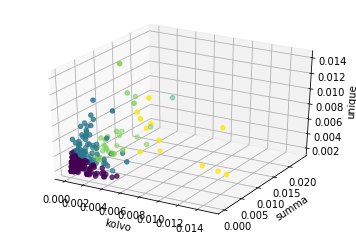

In [9]:
x_axis = train[:plotted_point_count, 0]
y_axis = train[:plotted_point_count, 1]
z_axis = train[:plotted_point_count, 2]
fig = plt.figure()#figsize=(18, 16))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel(xlabel="kolvo")
ax.set_ylabel(ylabel="summa")
ax.set_zlabel(zlabel="unique")
ax.scatter(x_axis, y_axis, z_axis, c=all_predictions[:plotted_point_count])


In [10]:
dfrm = pd.Series({'predicted':all_predictions})
trainDF['predicted'] = dfrm['predicted']
trainDF.head(15)

testCheck = pd.DataFrame(checks[train_count+10:train_count+11])
pred = model.predict(testCheck.values)
print(pred)
print(testCheck.head())

test_check_content = pd.DataFrame(data[data['iddoc'].isin(testCheck.index.values)])

test_check_content.head()

[4]
          kolvo     summa  count_uniq_good
240T5  0.008858  0.003202         0.006084


,iddoc,docdate,return,store,kassa,seller,collector,idtov,count,price,summa,name
104085,240T5,2017-04-0812:38:47,0,N,7,2Y,2W,IKW,70.0,52.9,3332.7,"Кабель ВВГнг LSп 3* 2,5 ..."
104086,240T5,2017-04-0812:38:47,0,N,7,2Y,2W,9H,4.0,82.0,295.2,Автом.выкл. ИЭК ВА 47- 29 1р 16А ...
104087,240T5,2017-04-0812:38:47,0,N,7,2Y,2W,9K,8.0,82.0,590.4,Автом.выкл. ИЭК ВА 47- 29 1р 25А ...
104088,240T5,2017-04-0812:38:47,0,N,7,2Y,2W,R0,15.0,13.0,175.5,Коробка расп. узкая ...
104089,240T5,2017-04-0812:38:47,0,N,7,2Y,2W,5ZT,20.0,35.0,630.0,"Кабель ВВГнг LSп 3* 1,5 ..."


In [11]:
group = trainDF[trainDF['predicted']==1]
group.shape

(1728, 4)

In [12]:
c = []
for i in range(num_clusters):
    group = trainDF[trainDF['predicted']==i]
    c.append(group.mean().values[:-1])
# print(c)

col = ['r','g','b','m', 'y', 'c']
a = []

print(testCheck.shape)
for index, t in testCheck.iterrows():
#     print(model.predict(np.array([t.values])))
#     print(predict([t['kolvo'],t['summa'], t['count_uniq_good']], c, index))

    closest = model.predict(np.array([t.values]))
    ax.scatter(t['kolvo'], t['summa'], t['count_uniq_good'], c=col[closest[0]])
    similar_checks = pd.DataFrame(trainDF[trainDF['predicted']==closest[0]])
    check_content = pd.DataFrame(data[data["iddoc"]==index])
    
    #получить все товары из похожих чеков
    train_tov = pd.DataFrame(data[data['iddoc'].isin(similar_checks.index.values)])
    
    
    for check_inedx, tovar in check_content.iterrows():
#         print (tovar['idtov'])
        #отбираем все те чеки в которых встречаются эти товары
#         print(train_tov[train_tov['idtov'] == tovar['idtov']])
        a.append(train_tov[train_tov['idtov'] == tovar['idtov']])
        
    a = pd.concat(a)
    a = pd.DataFrame(a.groupby(['iddoc']).size().reset_index(name='count'))
    
    a = a.sort_values(by=['count', 'iddoc'], ascending=False)
#     print(a)
    
    b = []
    
#     print(b)
    for ind, k in a.iterrows():
        t = pd.DataFrame(data[data["iddoc"]==a.iloc[ind]['iddoc']])
        
        b.extend(t.values)
    b = pd.DataFrame(b, columns = data.columns)
    summ = b.groupby(['idtov']).sum()
    summ['count_good'] = b.groupby(['idtov']).size()
    summ = summ.sort_values(by = ['count_good'], ascending=False)
#     print(b)

summ = pd.merge(summ, names, on='idtov')
summ.head(15)

(1, 3)


,idtov,return,kassa,count,price,summa,count_good,name
0,82X,0,318,21270.0,45.60,11848.80,76,Дюбель-хомут круглый 11*18мм белый ...
1,6O6,0,230,133.0,2240.00,4944.40,56,Изолента ПВХ REXANT цветная 19*25мм 09-2206 ...
2,9H,0,178,199.0,3860.00,15787.32,46,Автом.выкл. ИЭК ВА 47- 29 1р 16А ...
3,7M6,0,165,11700.0,19.35,4962.15,43,Дюбель-хомут круглый 5*10мм белый ...
4,7P9,0,176,885.0,305.50,6383.15,40,Подрозетник СЗМ3 д/бетон. стен ...
5,9K,0,137,207.0,2790.00,16333.54,33,Автом.выкл. ИЭК ВА 47- 29 1р 25А ...
6,24W,0,114,296.0,130.00,1381.55,26,Шина соединит. 1ф до 63А (штырь)(54шт в 1м) ИЭ...
7,IKW,0,114,2795.0,1366.40,136727.46,26,"Кабель ВВГнг LSп 3* 2,5 ..."
8,L0,0,106,2635.0,1137.00,109447.50,26,"Кабель ВВГп 3* 2,5 ..."
9,KZ,0,112,1390.0,713.70,39183.74,24,"Кабель ВВГп 3* 1,5 ..."


In [13]:
check_content.head()

,iddoc,docdate,return,store,kassa,seller,collector,idtov,count,price,summa,name
104085,240T5,2017-04-0812:38:47,0,N,7,2Y,2W,IKW,70.0,52.9,3332.7,"Кабель ВВГнг LSп 3* 2,5 ..."
104086,240T5,2017-04-0812:38:47,0,N,7,2Y,2W,9H,4.0,82.0,295.2,Автом.выкл. ИЭК ВА 47- 29 1р 16А ...
104087,240T5,2017-04-0812:38:47,0,N,7,2Y,2W,9K,8.0,82.0,590.4,Автом.выкл. ИЭК ВА 47- 29 1р 25А ...
104088,240T5,2017-04-0812:38:47,0,N,7,2Y,2W,R0,15.0,13.0,175.5,Коробка расп. узкая ...
104089,240T5,2017-04-0812:38:47,0,N,7,2Y,2W,5ZT,20.0,35.0,630.0,"Кабель ВВГнг LSп 3* 1,5 ..."


In [56]:
for index, tov in check_content.iterrows():
#     print(tov)
    summ = summ[summ.idtov != tov.idtov]
summ = summ.sort_values(by='idtov', ascending=True)
print(summ)
# print(summ[summ['idtov']=='9H'])

    idtov  return  kassa  count    price     summa  count_good  \
285  104A       0      7    1.0    544.0    516.80           1   
396  108Z       0      1    1.0    547.0    508.71           1   
339  10AC       0      1    1.0    219.0    212.43           1   
338   117       0      7   15.0     16.0    240.00           1   
337  117Z       0      7    2.0    781.0   1452.66           1   
186  1180       0      6    2.0   1840.0   1748.00           2   
85    11B       0     22   21.0     63.0    301.40           4   
36    11D       0     26   63.0    200.0   1465.00           8   
52    11E       0     15   21.0    135.0    512.73           5   
83    11F       0      8   35.0    180.0   1539.00           4   
336  11FZ       0      7    1.0     59.0     53.10           1   
335  11GK       0      5    4.0     97.0    376.36           1   
334   11H       0      1    5.0     84.0    420.00           1   
332  11SR       0      5  100.0      0.3     27.00           1   
191  11SS 